Below is a demonstration of the intended analysis for Chapter Two of my PhD. This analysis uses the BCS dataset using sweeps 1-6 (1970-2000). The following analysis focuses upon Youth Transition after mandatory education. This analysis attempts to understand the decisions, choices, and constraints that individuals face when negotiating entry into economic activity post-mandatory schooling for the first time. As such, the outcome variable of interest is a post-hoc economic activity entry from a sub-sample sweep at age 21 and sweep 6 when individuals were aged 30 - the outcome variable in question covers the month of September when individuals were aged 16 years old. The independent variables of interest are: Sex, Housing Tenure when a child, Parental Social Class when a child, Educational Attainment at 16 (Number of O-level Passes), Reading and Maths scores at age 11. 

The analysis below is made up of several important steps. Firstly the data is cleaned and recoded in a way that the data will be used all throughout the rest of the analysis. Secondly, descriptive statistics will be produced to best understand the data. Third, model construction and sensitivity analysis of social class measures. Finally, there will be an attempt to handle missing data within the model. 

In [1]:
import stata_setup

stata_setup.config("E:\Stata SE", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2023
Serial number: 401709309008
  Licensed to: Scott Oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


Part One: Data Cleaning 

The import command tells Jupyter Notebook to import stata from its given location in my internal system and call it up for use in the virutal notebook. 

In [2]:
%%stata

cd"D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se"

use "D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se\bcs3derived"


. 
. cd"D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se"
D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se

. 
. use "D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se\b
> cs3derived"

. 


This sets the root directory and loads the database related to the BCS cohort when they were 10 years old. This dataset contains maths and reading scores that can be used as prior educational outcome variables in the proposed model. The BCS does offer maths and reading scores at age 16 - similar to the NCDS, however the amount of missingness at this age for the BCS cohort makes choosing the age 16 scores over the age 10 scores much less attractive. 

In [3]:
%%stata

tab BD3MATHS
gen maths= BD3MATHS
replace maths=. if(maths<1)

tab BD3RREAD
gen reading= BD3RREAD
replace reading=. if(reading<1)


. 
. tab BD3MATHS

       1980: |
    Friendly |
  Maths Test |
score (i2504 |
   to i2575) |      Freq.     Percent        Cum.
-------------+-----------------------------------
Not computed |      3,242       21.79       21.79
           1 |          3        0.02       21.82
           3 |          3        0.02       21.84
           4 |          7        0.05       21.88
           5 |          5        0.03       21.92
           6 |          5        0.03       21.95
           7 |          9        0.06       22.01
           8 |         11        0.07       22.08
           9 |          6        0.04       22.12
          10 |         12        0.08       22.21
          11 |         15        0.10       22.31
          12 |         26        0.17       22.48
          13 |         23        0.15       22.64
          14 |         23        0.15       22.79
          15 |         33        0.22       23.01
          16 |         33        0.22       23.23
          17 |      

Both maths and reading scores have around 11,000 responses once the data is cleaned. 

Moving on, the dataset will need to be merged with other sweeps to gather the data required for the model proposed. To avoid an overally large dataset, all but the reading and maths scores, alongside the id for each individual will be dropped prior to merging. 

In [4]:
%%stata

keep reading maths BCSID


cd"D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se"

rename BCSID bcsid

merge m:1 bcsid using sn3723
drop _merge


. 
. keep reading maths BCSID

. 
. 
. cd"D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se"
D:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se

. 
. rename BCSID bcsid

. 
. merge m:1 bcsid using sn3723

    Result                      Number of obs
    -----------------------------------------
    Not matched                         4,151
        from master                     4,151  (_merge==1)
        from using                          0  (_merge==2)

    Matched                            14,952  (_merge==3)
    -----------------------------------------

. drop _merge

. 


Merging datasets will follow in a temporal manner. Starting at the oldest dataset (age 10) and ending in the youngest (age 30). 

In [5]:
%%stata

tab d2

gen htenure=.
replace htenure=1 if (d2==1)
replace htenure=1 if (d2==2)

replace htenure=0 if (d2==3)
replace htenure=0 if (d2==4)
replace htenure=0 if (d2==5)
replace htenure=0 if (d2==6)
replace htenure=0 if (d2==7)

tab htenure

label define tenure_lbl 1"Own Home" 0"Don't Own Home"
label value htenure tenure_lbl

tab htenure

gen female = sex10
replace female=0 if (female==2)
label define female_lbl 0"Male" 1"Female"
label values female female_lbl 

keep bcsid maths reading htenure female


. 
. tab d2

  IS ACCOMMODATION OWNED OR |
                 RENTED?    |      Freq.     Percent        Cum.
----------------------------+-----------------------------------
             Owned outright |      1,539       11.26       11.26
               Being bought |      6,836       50.00       61.26
            Rented, Council |      4,401       32.19       93.45
Rented, Private unfurnished |        425        3.11       96.56
  Rented, Private furnished |         31        0.23       96.79
         Tied to occupation |        392        2.87       99.66
                      Other |         47        0.34      100.00
----------------------------+-----------------------------------
                      Total |     13,671      100.00

. 
. gen htenure=.
(19,103 missing values generated)

. replace htenure=1 if (d2==1)
(1,539 real changes made)

. replace htenure=1 if (d2==2)
(6,836 real changes made)

. 
. replace htenure=0 if (d2==3)
(4,401 real changes made)

. replace htenure=0 i

The next dataset in question is the Occupational Codes dataset created by (Gregg 2012). This provides occupational codes for both the father and mother of the participant at age 10. This is identical in coding structure to the occupational codes for fathers in the NCDS with the added bonus of being available for mothers also. Having both father and mother occupational codes allows for mothers occupational data to replace missing data from fathers. Unfortunately the BCS does not offer data on the hours total worked by each parent so a true dominance approach could not be implemented. This filling in missing data approach also only works for two of the three social stratification measures - NS-SEC and RGSC. Camsis is sensitive to the gender of the parent. 

In [6]:
%%stata

cd "D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"

rename bcsid BCSID

merge m:1 BCSID using bcs3_occupation_coding_father

gen nssecf=. 
replace nssecf=1 if (B3FSNSSEC==2)
replace nssecf=1 if (B3FSNSSEC==3.1)
replace nssecf=1 if (B3FSNSSEC==3.2)
replace nssecf=1 if (B3FSNSSEC==3.3)
replace nssecf=1 if (B3FSNSSEC==4.1)
replace nssecf=1 if (B3FSNSSEC==4.2)
replace nssecf=1 if (B3FSNSSEC==4.3)
replace nssecf=2 if (B3FSNSSEC==5)
replace nssecf=2 if (B3FSNSSEC==7.1)
replace nssecf=2 if (B3FSNSSEC==7.2)
replace nssecf=2 if (B3FSNSSEC==7.3)
replace nssecf=2 if (B3FSNSSEC==7.4)
replace nssecf=3 if (B3FSNSSEC==8.1)
replace nssecf=4 if (B3FSNSSEC==9.1)
replace nssecf=4 if (B3FSNSSEC==9.2)
replace nssecf=5 if (B3FSNSSEC==10)
replace nssecf=5 if (B3FSNSSEC==11.1)
replace nssecf=5 if (B3FSNSSEC==11.2)
replace nssecf=6 if (B3FSNSSEC==12.1)
replace nssecf=6 if (B3FSNSSEC==12.2)
replace nssecf=6 if (B3FSNSSEC==12.3)
replace nssecf=6 if (B3FSNSSEC==12.4)
replace nssecf=6 if (B3FSNSSEC==12.5)
replace nssecf=6 if (B3FSNSSEC==12.6)
replace nssecf=6 if (B3FSNSSEC==12.7)
replace nssecf=7 if (B3FSNSSEC==13.1)
replace nssecf=7 if (B3FSNSSEC==13.2)
replace nssecf=7 if (B3FSNSSEC==13.3)
replace nssecf=7 if (B3FSNSSEC==13.4)
replace nssecf=7 if (B3FSNSSEC==13.5)

label define nssec_lbl 1"Higher managerial, administrative and professional occupations" 2"Lower managerial, administrative and professional occupations" 3"Intermediate occupations" 4"Small employers and own account workers" 5"Lower supervisory and technical occupations" 6"Semi-routine occupations" 7"Routine occupations"
label value nssecf nssec_lbl

rename B3FSCMSIS camsisf

gen rgscf=.
replace rgscf=1 if (B3FSRGSC==1)
replace rgscf=2 if (B3FSRGSC==2)
replace rgscf=3 if (B3FSRGSC==3.1)
replace rgscf=4 if (B3FSRGSC==3.2)
replace rgscf=5 if (B3FSRGSC==4)
replace rgscf=6 if (B3FSRGSC==5)

label define rgsc_lbl 1"Professional" 2"Managerial and Technical" 3"Skilled non-manual" 4"Skilled manual" 5"Partly skilled" 6"Unskilled"
label value rgscf rgsc_lbl

keep BCSID maths reading htenure female nssecf rgscf camsisf



. 
. cd "D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
D:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9

. 
. rename bcsid BCSID

. 
. merge m:1 BCSID using bcs3_occupation_coding_father

    Result                      Number of obs
    -----------------------------------------
    Not matched                         4,393
        from master                     4,311  (_merge==1)
        from using                         82  (_merge==2)

    Matched                            14,792  (_merge==3)
    -----------------------------------------

. 
. gen nssecf=. 
(19,185 missing values generated)

. replace nssecf=1 if (B3FSNSSEC==2)
(570 real changes made)

. replace nssecf=1 if (B3FSNSSEC==3.1)
(624 real changes made)

. replace nssecf=1 if (B3FSNSSEC==3.2)
(120 real changes made)

. replace nssecf=1 if (B3FSNSSEC==3.3)
(16 real changes made)

. replace nssecf=1 if (B3FSNSSEC==4.1)
(905 real changes made)

. replace nssecf=1 if (B3FSNSSEC==4.2

In [7]:
%%stata

merge m:1 BCSID using bcs3_occupation_coding_mother

gen nssecm=. 
replace nssecm=1 if (B3MSNSSEC==2)
replace nssecm=1 if (B3MSNSSEC==3.1)
replace nssecm=1 if (B3MSNSSEC==3.2)
replace nssecm=1 if (B3MSNSSEC==3.3)
replace nssecm=1 if (B3MSNSSEC==4.1)
replace nssecm=1 if (B3MSNSSEC==4.2)
replace nssecm=1 if (B3MSNSSEC==4.3)
replace nssecm=2 if (B3MSNSSEC==5)
replace nssecm=2 if (B3MSNSSEC==7.1)
replace nssecm=2 if (B3MSNSSEC==7.2)
replace nssecm=2 if (B3MSNSSEC==7.3)
replace nssecm=2 if (B3MSNSSEC==7.4)
replace nssecm=3 if (B3MSNSSEC==8.1)
replace nssecm=4 if (B3MSNSSEC==9.1)
replace nssecm=4 if (B3MSNSSEC==9.2)
replace nssecm=5 if (B3MSNSSEC==10)
replace nssecm=5 if (B3MSNSSEC==11.1)
replace nssecm=5 if (B3MSNSSEC==11.2)
replace nssecm=6 if (B3MSNSSEC==12.1)
replace nssecm=6 if (B3MSNSSEC==12.2)
replace nssecm=6 if (B3MSNSSEC==12.3)
replace nssecm=6 if (B3MSNSSEC==12.4)
replace nssecm=6 if (B3MSNSSEC==12.5)
replace nssecm=6 if (B3MSNSSEC==12.6)
replace nssecm=6 if (B3MSNSSEC==12.7)
replace nssecm=7 if (B3MSNSSEC==13.1)
replace nssecm=7 if (B3MSNSSEC==13.2)
replace nssecm=7 if (B3MSNSSEC==13.3)
replace nssecm=7 if (B3MSNSSEC==13.4)
replace nssecm=7 if (B3MSNSSEC==13.5)

label value nssecm nssec_lbl

rename B3MSCMSIS camsism

gen rgscm=.
replace rgscm=1 if (B3MSRGSC==1)
replace rgscm=2 if (B3MSRGSC==2)
replace rgscm=3 if (B3MSRGSC==3.1)
replace rgscm=4 if (B3MSRGSC==3.2)
replace rgscm=5 if (B3MSRGSC==4)
replace rgscm=6 if (B3MSRGSC==5)

label value rgscm rgsc_lbl

keep BCSID maths reading htenure female nssecf rgscf camsisf camsisf nssecm rgscm camsism 


. 
. merge m:1 BCSID using bcs3_occupation_coding_mother

    Result                      Number of obs
    -----------------------------------------
    Not matched                         4,311
        from master                     4,311  (_merge==1)
        from using                          0  (_merge==2)

    Matched                            14,874  (_merge==3)
    -----------------------------------------

. 
. gen nssecm=. 
(19,185 missing values generated)

. replace nssecm=1 if (B3MSNSSEC==2)
(51 real changes made)

. replace nssecm=1 if (B3MSNSSEC==3.1)
(67 real changes made)

. replace nssecm=1 if (B3MSNSSEC==3.2)
(24 real changes made)

. replace nssecm=1 if (B3MSNSSEC==3.3)
(4 real changes made)

. replace nssecm=1 if (B3MSNSSEC==4.1)
(899 real changes made)

. replace nssecm=1 if (B3MSNSSEC==4.2)
(32 real changes made)

. replace nssecm=1 if (B3MSNSSEC==4.3)
(33 real changes made)

. replace nssecm=2 if (B3MSNSSEC==5)
(170 real changes made)

. replace nssecm=2 if (

Both father and mother occupational codes have been merged and cleaned. Now to create the improved NS-SEC and RGSC measures whereby mothers fill in missingness. 

In [8]:
%%stata

gen nssecdom=.
replace nssecdom=1 if (nssecf==1)
replace nssecdom=2 if (nssecf==2)
replace nssecdom=3 if (nssecf==3)
replace nssecdom=4 if (nssecf==4)
replace nssecdom=5 if (nssecf==5)
replace nssecdom=6 if (nssecf==6)
replace nssecdom=7 if (nssecf==7)
replace nssecdom=1 if (nssecf==. & nssecm==1)
replace nssecdom=2 if (nssecf==. & nssecm==2)
replace nssecdom=3 if (nssecf==. & nssecm==3)
replace nssecdom=4 if (nssecf==. & nssecm==4)
replace nssecdom=5 if (nssecf==. & nssecm==5)
replace nssecdom=6 if (nssecf==. & nssecm==6)
replace nssecdom=7 if (nssecf==. & nssecm==7)
tab nssecdom

label values nssecdom nssec_lbl

gen rgscdom=. 
replace rgscdom=1 if (rgscf==1)
replace rgscdom=2 if (rgscf==2)
replace rgscdom=3 if (rgscf==3)
replace rgscdom=4 if (rgscf==4)
replace rgscdom=5 if (rgscf==5)
replace rgscdom=6 if (rgscf==6)
replace rgscdom=1 if (rgscf==. & rgscm==1)
replace rgscdom=2 if (rgscf==. & rgscm==2)
replace rgscdom=3 if (rgscf==. & rgscm==3)
replace rgscdom=4 if (rgscf==. & rgscm==4)
replace rgscdom=5 if (rgscf==. & rgscm==5)
replace rgscdom=6 if (rgscf==. & rgscm==6)

label values rgscdom rgsc_lbl

keep BCSID maths reading htenure female nssecf rgscf camsisf camsisf nssecm rgscm camsism nssecdom rgscdom


. 
. gen nssecdom=.
(19,185 missing values generated)

. replace nssecdom=1 if (nssecf==1)
(2,441 real changes made)

. replace nssecdom=2 if (nssecf==2)
(1,785 real changes made)

. replace nssecdom=3 if (nssecf==3)
(224 real changes made)

. replace nssecdom=4 if (nssecf==4)
(1,358 real changes made)

. replace nssecdom=5 if (nssecf==5)
(2,032 real changes made)

. replace nssecdom=6 if (nssecf==6)
(1,739 real changes made)

. replace nssecdom=7 if (nssecf==7)
(2,466 real changes made)

. replace nssecdom=1 if (nssecf==. & nssecm==1)
(121 real changes made)

. replace nssecdom=2 if (nssecf==. & nssecm==2)
(238 real changes made)

. replace nssecdom=3 if (nssecf==. & nssecm==3)
(13 real changes made)

. replace nssecdom=4 if (nssecf==. & nssecm==4)
(21 real changes made)

. replace nssecdom=5 if (nssecf==. & nssecm==5)
(28 real changes made)

. replace nssecdom=6 if (nssecf==. & nssecm==6)
(286 real changes made)

. replace nssecdom=7 if (nssecf==. & nssecm==7)
(381 real changes made

Appropriate social class measures have now been constructed. Now onto merging with the age 26 dataset to aquire educational attainment (O-level passes). 

In [11]:
%%stata

cd "D:\Stata data and do\BCS\BCS Sweep 26\stata\stata11"

rename BCSID bcsid

merge m:1 bcsid using bcs96x
drop _merge

tab b960154

codebook b960154

gen olevel=b960154

replace olevel=. if(olevel==-8)
replace olevel=. if(olevel==-3)

tab b960157

replace olevel=0 if(b960157==1)
replace olevel=0 if(b960157==2)
replace olevel=0 if(b960157==3)
replace olevel=0 if(b960157==4)
replace olevel=0 if(b960157==5)
replace olevel=0 if(b960157==6)
replace olevel=0 if(b960157==7)
replace olevel=0 if(b960157==8)
replace olevel=0 if(b960157==9)
replace olevel=0 if(b960157==10)
replace olevel=0 if(b960157==11)
replace olevel=0 if(b960157==12)


gen obin=.
replace obin=0 if(olevel==0)
replace obin=0 if(olevel==1)
replace obin=0 if(olevel==2)
replace obin=0 if(olevel==3)
replace obin=0 if(olevel==4)

replace obin=1 if(olevel>=5)

tab obin

label define obin_lbl 0"Less than 5 O-levels" 1"5 or More O-levels"
label value obin obin_lbl

tab obin

keep BCSID maths reading htenure female nssecf rgscf camsisf camsisf nssecm rgscm camsism nssecdom rgscdom obin

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\Stata SE\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: 
. 
. cd "D:\Stata data and do\BCS\BCS Sweep 26\stata\stata11"
D:\Stata data and do\BCS\BCS Sweep 26\stata\stata11

. 
. rename BCSID bcsid
variable BCSID not found
r(111);
r(111);



All independent variables have now been constructed. Prior to merging the rest of the datasets together the root directory will be changed to the master file and the new merged dataset will be saved prior to construction of the outcome variable that requires the 21 subsample and the 30 sample. 

In [12]:
%%stata

cd "D:\Stata data and do\BCS"
save BCS_Chapter_Two_Varaibles, replace

cd "D:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11"
use "D:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11\bcs21yearsample"

keep bcsid va86sep

cd "D:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"

merge m:m bcsid using bcs2000
drop _merge


. 
. cd "D:\Stata data and do\BCS"
D:\Stata data and do\BCS

. save BCS_Chapter_Two_Varaibles, replace
file BCS_Chapter_Two_Varaibles.dta saved

. 
. cd "D:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11"
D:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11

. use "D:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11\bcs21yearsam
> ple"

. 
. keep bcsid va86sep

. 
. cd "D:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"
D:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se

. 
. merge m:m bcsid using bcs2000
(label sex already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                        10,176
        from master                       281  (_merge==1)
        from using                      9,895  (_merge==2)

    Matched                             1,366  (_merge==3)
    -----------------------------------------

. drop _merge

. 


In [13]:
%%stata

gen prev10= activi10 if (starty10==1986 & startm10==9)
gen prev9= activit9 if (startyr9==1986 & startmo9==9)
gen prev8= activit8 if (startyr8==1986 & startmo8==9)
gen prev7= activit7 if (startyr7==1986 & startmo7==9)
gen prev6= activit6 if (startyr6==1986 & startmo6==9)
gen prev5= activit5 if (startyr5==1986 & startmo5==9)
gen prev4= activit4 if (startyr4==1986 & startmo4==9)
gen prev3= activit3 if (startyr3==1986 & startmo3==9)
gen prev2= activit2 if (startyr2==1986 & startmo2==9)
gen prev1= activity if (startyr==1986 & startmo==9)
gen curact= econact if (cstartyr==1986 & cstartmo==9)


codebook prev10 prev9 prev8 prev7 prev6 prev5 prev4 prev3 prev2 prev1 curact, compact

replace prev10= 2 if (prev10==6)
replace prev10= 3 if (prev10==7)

replace prev9= 2 if (prev9==6)
replace prev9= 3 if (prev9==7)
replace prev9= . if (prev9==12)

replace prev8= 1 if (prev8==3)
replace prev8= 4 if (prev8==5)
replace prev8= 2 if (prev8==6)
replace prev8= 3 if (prev8==7)
replace prev8= . if (prev8==12)

replace prev7= 1 if (prev7==2)
replace prev7= 4 if (prev7==5)
replace prev7= 2 if (prev7==6)
replace prev7= 3 if (prev7==7)
replace prev7= 4 if (prev7==11)
replace prev7= . if (prev7==12)

replace prev6= 1 if (prev6==2)
replace prev6= 2 if (prev6==6)
replace prev6= 3 if (prev6==7)
replace prev6= . if (prev6==12)

replace prev5= 1 if (prev5==2)
replace prev5= 1 if (prev5==3)
replace prev5= 4 if (prev5==5)
replace prev5= 2 if (prev5==6)
replace prev5= 3 if (prev5==7)
replace prev5= . if (prev5==12)

replace prev4= 1 if (prev4==2)
replace prev4= 1 if (prev4==3)
replace prev4= 4 if (prev4==5)
replace prev4= 2 if (prev4==6)
replace prev4= 3 if (prev4==7)
replace prev4= 4 if (prev4==9)
replace prev4= 4 if (prev4==10)
replace prev4= . if (prev4==12)

replace prev3= 1 if (prev3==2)
replace prev3= 1 if (prev3==3)
replace prev3= 4 if (prev3==5)
replace prev3= 2 if (prev3==6)
replace prev3= 3 if (prev3==7)
replace prev3= . if (prev3==12)

replace prev2= 1 if (prev2==2)
replace prev2= 1 if (prev2==3)
replace prev2= 4 if (prev2==5)
replace prev2= 2 if (prev2==6)
replace prev2= 3 if (prev2==7)
replace prev2= 4 if (prev2==10)
replace prev2= . if (prev2==12)

replace prev1= 1 if (prev1==2)
replace prev1= 1 if (prev1==3)
replace prev1= 4 if (prev1==5)
replace prev1= 2 if (prev1==6)
replace prev1= 3 if (prev1==7)
replace prev1= 4 if (prev1==11)
replace prev1= . if (prev1==12)

replace curact= 1 if (curact==2)
replace curact= 1 if (curact==3)
replace curact= 4 if (curact==9)
replace curact= 4 if (curact==10)


gen econ2 =. 

replace econ2=1 if (prev10==1)
replace econ2=1 if (prev9==1)
replace econ2=1 if (prev8==1)
replace econ2=1 if (prev7==1)
replace econ2=1 if (prev6==1)
replace econ2=1 if (prev5==1)
replace econ2=1 if (prev4==1)
replace econ2=1 if (prev3==1)
replace econ2=1 if (prev2==1)
replace econ2=1 if (prev1==1)
replace econ2=1 if (curact==1)

replace econ2=2 if (prev10==2)
replace econ2=2 if (prev9==2)
replace econ2=2 if (prev8==2)
replace econ2=2 if (prev7==2)
replace econ2=2 if (prev6==2)
replace econ2=2 if (prev5==2)
replace econ2=2 if (prev4==2)
replace econ2=2 if (prev3==2)
replace econ2=2 if (prev2==2)
replace econ2=2 if (prev1==2)
replace econ2=2 if (curact==2)

replace econ2=3 if (prev10==3)
replace econ2=3 if (prev9==3)
replace econ2=3 if (prev8==3)
replace econ2=3 if (prev7==3)
replace econ2=3 if (prev6==3)
replace econ2=3 if (prev5==3)
replace econ2=3 if (prev4==3)
replace econ2=3 if (prev3==3)
replace econ2=3 if (prev2==3)
replace econ2=3 if (prev1==3)
replace econ2=3 if (curact==3)

replace econ2=4 if (prev10==4)
replace econ2=4 if (prev9==4)
replace econ2=4 if (prev8==4)
replace econ2=4 if (prev7==4)
replace econ2=4 if (prev6==4)
replace econ2=4 if (prev5==4)
replace econ2=4 if (prev4==4)
replace econ2=4 if (prev3==4)
replace econ2=4 if (prev2==4)
replace econ2=4 if (prev1==4)
replace econ2=4 if (curact==4)


label define econ201_lbl 1"Employment" 2"Education" 3"Training & Apprenticeships" 4"Unemployment & OLF"
label values econ2 econ201_lbl


gen econ1=.
replace econ1=1 if (va86sep>=5 & va86sep<=7)
replace econ1=2 if (va86sep==4)
replace econ1=3 if (va86sep==3)
replace econ1=4 if (va86sep>=1 & va86sep<=2)
replace econ1=. if (va86sep==8)

label values econ1 econ201_lbl


. 
. gen prev10= activi10 if (starty10==1986 & startm10==9)
(11,519 missing values generated)

. gen prev9= activit9 if (startyr9==1986 & startmo9==9)
(11,495 missing values generated)

. gen prev8= activit8 if (startyr8==1986 & startmo8==9)
(11,463 missing values generated)

. gen prev7= activit7 if (startyr7==1986 & startmo7==9)
(11,442 missing values generated)

. gen prev6= activit6 if (startyr6==1986 & startmo6==9)
(11,362 missing values generated)

. gen prev5= activit5 if (startyr5==1986 & startmo5==9)
(11,316 missing values generated)

. gen prev4= activit4 if (startyr4==1986 & startmo4==9)
(11,227 missing values generated)

. gen prev3= activit3 if (startyr3==1986 & startmo3==9)
(11,180 missing values generated)

. gen prev2= activit2 if (startyr2==1986 & startmo2==9)
(11,140 missing values generated)

. gen prev1= activity if (startyr==1986 & startmo==9)
(11,207 missing values generated)

. gen curact= econact if (cstartyr==1986 & cstartmo==9)
(11,419 missing values generate

In [14]:
%%stata

misstable summarize econ1 econ2 

misstable patterns econ1 econ2 


. 
. misstable summarize econ1 econ2 
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
         econ1 |     9,924               1,618  |      4          1           4
         econ2 |     9,455               2,087  |      4          1           4
  -----------------------------------------------------------------------------

. 
. misstable patterns econ1 econ2 

   Missing-value patterns
     (1 means complete)

              |   Pattern
    Percent   |  1  2
  ------------+-------------
        3%    |  1  1
              |
       70     |  0  0
       16     |  1  0
       12     |  0  1
  ------------+-------------
      100%    |

  Variables are  (1) econ2  (2) econ1


There are now two different time periods that have the same outcome varaible with difference levels of response from different members in the cohort. The desire is to merge these two variables together. As seen with the miss table, only 3% of cases overlap so the combined variable will see a reduction of 27% of missingness with new cases. For the overlapping cases, a temporal dominance approach is used. Whenever a case overlaps and they are not identical the subsample 21 answer is given precedent over the age 30 answer due to someone at age 21 being more likely to recall their economic activity at 16 than when they are 30. 

In [15]:
%%stata

gen econ201=. 
replace econ201=1 if (econ2==1)
replace econ201=1 if (econ1==1)

replace econ201=2 if (econ2==2)
replace econ201=2 if (econ1==2)

replace econ201=3 if (econ2==3)
replace econ201=3 if (econ1==3)

replace econ201=4 if (econ2==4)
replace econ201=4 if (econ1==4)

label values econ201 econ201_lbl


. 
. gen econ201=. 
(11,542 missing values generated)

. replace econ201=1 if (econ2==1)
(824 real changes made)

. replace econ201=1 if (econ1==1)
(343 real changes made)

. 
. replace econ201=2 if (econ2==2)
(894 real changes made)

. replace econ201=2 if (econ1==2)
(614 real changes made)

. 
. replace econ201=3 if (econ2==3)
(328 real changes made)

. replace econ201=3 if (econ1==3)
(389 real changes made)

. 
. replace econ201=4 if (econ2==4)
(41 real changes made)

. replace econ201=4 if (econ1==4)
(75 real changes made)

. 
. label values econ201 econ201_lbl

. 


Merge once again with main dataset. 

In [16]:
%%stata

cd"D:\Stata data and do\BCS"

merge m:m bcsid using BCS_Chapter_Two_Varaibles
drop _merge


. 
. cd"D:\Stata data and do\BCS"
D:\Stata data and do\BCS

. 
. merge m:m bcsid using BCS_Chapter_Two_Varaibles
(label empstat2 already defined)
(label empstat already defined)
(label sex already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                         7,588
        from master                         0  (_merge==1)
        from using                      7,588  (_merge==2)

    Matched                            11,597  (_merge==3)
    -----------------------------------------

. drop _merge

. 


In [17]:
%%stata

label variable econ201 "Economic Activity of Respondent"
label variable obin "Educational Attainment O-levels"
label variable female "Sex of Respondent"
label variable htenure "Housing Tenure of Respondent when Child"
label variable nssecdom "Dominant NS-SEC Social Class of Father"
label variable rgscdom "RGSC Social Class of Father"
label variable camsisf "CAMSIS of Father"
label variable reading "Reading Score"
label variable maths "Maths Score"

keep bcsid econ201 obin female htenure nssecdom rgscdom camsisf reading maths

codebook econ201 obin female htenure nssecdom rgscdom camsisf reading maths, compact

cd "D:\Stata data and do\BCS"
save BCS_Chapter_Two, replace


. 
. label variable econ201 "Economic Activity of Respondent"

. label variable obin "Educational Attainment O-levels"

. label variable female "Sex of Respondent"

. label variable htenure "Housing Tenure of Respondent when Child"

. label variable nssecdom "Dominant NS-SEC Social Class of Father"

. label variable rgscdom "RGSC Social Class of Father"

. label variable camsisf "CAMSIS of Father"

. label variable reading "Reading Score"

. label variable maths "Maths Score"

. 
. keep bcsid econ201 obin female htenure nssecdom rgscdom camsisf reading maths

. 
. codebook econ201 obin female htenure nssecdom rgscdom camsisf reading maths, 
> compact

Variable     Obs Unique      Mean  Min  Max  Label
-------------------------------------------------------------------------------
econ201     3430      4  1.958017    1    4  Economic Activity of Respondent
obin       19185      2  .8276779    0    1  Educational Attainment O-levels
female     14952      2  .5187266    0    1  Sex of Re

Part Two: Descriptive Statistics

In [18]:
%%stata

codebook econ201 obin female htenure nssecdom rgscdom camsisf reading maths, compact

keep if !missing(econ201, obin, female, htenure, nssecdom, rgscdom, camsisf, reading, maths)

count


. 
. codebook econ201 obin female htenure nssecdom rgscdom camsisf reading maths, 
> compact

Variable     Obs Unique      Mean  Min  Max  Label
-------------------------------------------------------------------------------
econ201     3430      4  1.958017    1    4  Economic Activity of Respondent
obin       19185      2  .8276779    0    1  Educational Attainment O-levels
female     14952      2  .5187266    0    1  Sex of Respondent
htenure    13671      2  .6126106    0    1  Housing Tenure of Respondent wh...
nssecdom   13133      7  4.204218    1    7  Dominant NS-SEC Social Class of...
rgscdom    13133      6  3.556765    1    6  RGSC Social Class of Father
camsisf    12045     68  4.597792  1.8  8.7  CAMSIS of Father
reading    11640     65  40.23771    1   65  Reading Score
maths      11633     71  43.95117    1   72  Maths Score
-------------------------------------------------------------------------------

. 
. keep if !missing(econ201, obin, female, htenure, nssecdom, r

Seeing a CCA descriptive count of responses shows that there are 2,123 cases where data is present across all variables. Now to produce a descriptive table. 

In [19]:
%%stata

collect clear

table (var) (), statistic(fvfrequency econ201 obin female htenure nssecdom rgscdom) ///
					statistic(fvpercent econ201 obin female htenure nssecdom rgscdom) /// 
					statistic(mean camsisf reading maths) ///  
					statistic(sd camsisf reading maths) 			
collect remap result[fvfrequency mean] = Col[1 1] 
	collect remap result[fvpercent sd] = Col[2 2]
collect get resname = "Mean", tag(Col[1] var[mylabel]) 
	collect get resname = "SD", tag(Col[2] var[mylabel])
collect get empty = "  ", tag(Col[1] var[empty]) 
	collect get empty = "  ", tag(Col[2] var[empty])
    
count
	collect get n = `r(N)', tag(Col[2] var[n])
	
collect layout (var[1.econ201 2.econ201 3.econ201 4.econ201 5.econ201 ///
					0.obin 1.obin ///
					0.female 1.female  ///
					0.htenure 1.htenure ///
					1.nssecdom 2.nssecdom 3.nssecdom 4.nssecdom 5.nssecdom 6.nssecdom 7.nssecdom ///
					1.rgscdom 2.rgscdom 3.rgscdom 4.rgscdom 5.rgscdom 6.rgscdom ///
					empty mylabel ///
					reading ///
					maths ///
					camsisf ///
					empty n]) (Col[1 2])

collect label levels Col 1 "n" 2 "%"			
collect style header Col, title(hide)
collect style header var[empty mylabel], level(hide)
collect style row stack, nobinder
collect style cell var[econ201 obin female htenure nssecdom rgscdom]#Col[1], nformat(%6.0fc) 
collect style cell var[econ201 obin female htenure nssecdom rgscdom]#Col[2], nformat(%6.2f) sformat("%s%%") 	
collect style cell var[camsisf reading maths], nformat(%6.2f)
collect style cell border_block[item row-header], border(top, pattern(nil)) 
collect title "Table 1: Descriptive Statistics for Economic Activity"
collect note "Data Source: BCS"
collect preview

collect export "Table1BCS.docx", replace


. 
. collect clear

. 
. table (var) (), statistic(fvfrequency econ201 obin female htenure nssecdom rg
> scdom) ///
>                                         statistic(fvpercent econ201 obin fema
> le htenure nssecdom rgscdom) /// 
>                                         statistic(mean camsisf reading maths)
>  ///  
>                                         statistic(sd camsisf reading maths)  
>                    

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                      |  Factor variable frequency   Factor variable percent       Mean   Standard deviation
------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------
Economic

Table 1: Descriptive Statistics for Economic Activity
----------------------------------------------------------------------------------
                                                                 |      n        %
Economic Activity of Respondent                                  |                
  Employment                                                     |    682   32.12%
  Education                                                      |    950   44.75%
  Training & Apprenticeships                                     |    434   20.44%
  Unemployment & OLF                                             |     57    2.68%
Educational Attainment O-levels                                  |                
  Less than 5 O-levels                                           |    670   31.56%
  5 or More O-levels                                             |  1,453   68.44%
Sex of Respondent                                                |                
  Male                           

Part Three: CCA Models


. 
. mlogit econ201 i.obin i.female i.htenure i.nssecdom reading maths, b(1)

Iteration 0:   log likelihood = -2433.5586  
Iteration 1:   log likelihood =  -2218.224  
Iteration 2:   log likelihood =  -2215.939  
Iteration 3:   log likelihood = -2215.8404  
Iteration 4:   log likelihood = -2215.8319  
Iteration 5:   log likelihood = -2215.8302  
Iteration 6:   log likelihood =   -2215.83  
Iteration 7:   log likelihood = -2215.8299  
Iteration 8:   log likelihood = -2215.8299  

Multinomial logistic regression                         Number of obs =  2,123
                                                        LR chi2(33)   = 435.46
                                                        Prob > chi2   = 0.0000
Log likelihood = -2215.8299                             Pseudo R2     = 0.0895

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+--------------------------

At: 0.obin     = .3155911 (mean)
    1.obin     = .6844089 (mean)
    0.female   = .5294395 (mean)
    1.female   = .4705605 (mean)
    0.htenure  = .3231276 (mean)
    1.htenure  = .6768724 (mean)
    1.nssecdom =  .193594 (mean)
    2.nssecdom = .1464908 (mean)
    3.nssecdom = .0169571 (mean)
    4.nssecdom =  .104569 (mean)
    5.nssecdom = .1771079 (mean)
    6.nssecdom = .1530853 (mean)
    7.nssecdom = .2081959 (mean)
    reading    = 41.03862 (mean)
    maths      = 44.34621 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    nssecdom |
Higher ma..  |   .1404223   .0198884     7.06   0.000     .1014417    .1794029
Lower man..  |   .1897831   .0239789     7.91   0.000     .1427853    .2367808
Intermedi..  |   .2576257   .0794587     3.24   0.001  

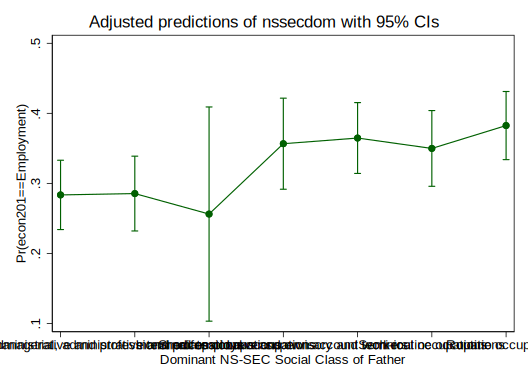

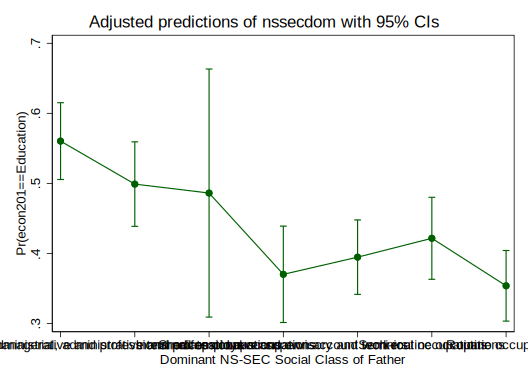

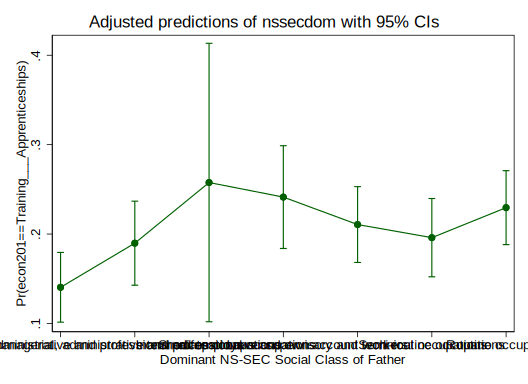

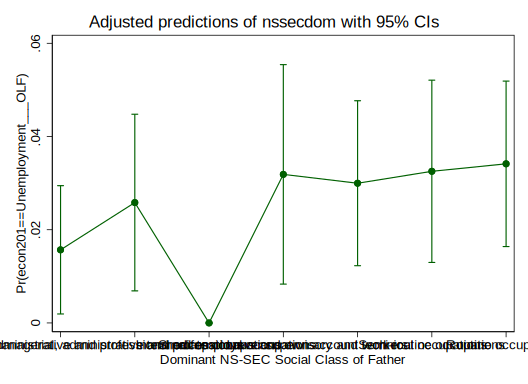

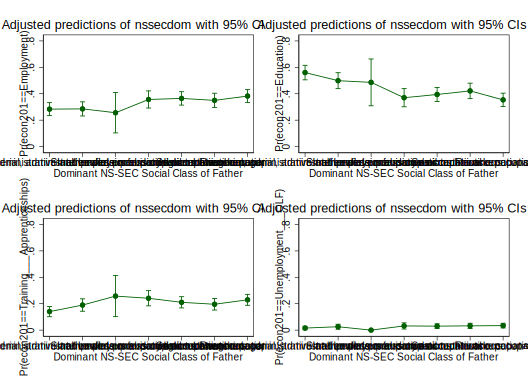

In [20]:
%%stata

mlogit econ201 i.obin i.female i.htenure i.nssecdom reading maths, b(1)
est store modelone

set scheme s1color, permanent 
margins nssecdom, atmeans predict(outcome(1))
marginsplot, name(emmean1)
margins nssecdom, atmeans predict(outcome(2))
marginsplot, name(scmean1)
margins nssecdom, atmeans predict(outcome(3))
marginsplot, name(trmean1)
margins nssecdom, atmeans predict(outcome(4))
marginsplot, name(unmean1)
	
graph combine emmean1 scmean1 trmean1 unmean1, ycommon

quietly mlogit econ201 i.obin i.female i.htenure i.nssecdom reading maths

margins, dydx(*) post

RGSC and CAMSIS models

In [21]:
%%stata

mlogit econ201 i.obin i.female i.htenure i.rgscdom reading maths, b(1)
est store modeltwo

mlogit econ201 i.obin i.female i.htenure camsisf reading maths, b(1)
est store modelthree


. 
. mlogit econ201 i.obin i.female i.htenure i.rgscdom reading maths, b(1)

Iteration 0:   log likelihood = -2433.5586  
Iteration 1:   log likelihood = -2216.7536  
Iteration 2:   log likelihood = -2214.4214  
Iteration 3:   log likelihood = -2214.4035  
Iteration 4:   log likelihood = -2214.4034  

Multinomial logistic regression                         Number of obs =  2,123
                                                        LR chi2(30)   = 438.31
                                                        Prob > chi2   = 0.0000
Log likelihood = -2214.4034                             Pseudo R2     = 0.0901

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |  (base outcome)
-------------+----------------------------------------------------------------
Education    |
        obin |
5 

Alltogether now

In [23]:
%%stata

est table modelone modeltwo modelthree, stats(ll bic N) b(%9.4g) star

cd "D:\Stata data and do\BCS"
save BCS_Chapter_Two_Model_One, replace


. 
. est table modelone modeltwo modelthree, stats(ll bic N) b(%9.4g) star

-----------------------------------------------------------
    Variable |   modelone       modeltwo      modelthree   
-------------+---------------------------------------------
Employment   |
        obin |
5 or More..  | (omitted)      (omitted)      (omitted)     
             |
      female |
     Female  | (omitted)      (omitted)      (omitted)     
             |
     htenure |
   Own Home  | (omitted)      (omitted)      (omitted)     
             |
    nssecdom |
          2  | (omitted)                                   
          3  | (omitted)                                   
          4  | (omitted)                                   
          5  | (omitted)                                   
          6  | (omitted)                                   
          7  | (omitted)                                   
             |
     reading | (omitted)      (omitted)      (omitted)     
       m

Part Four: Missing Data

In [24]:
%%stata

use "D:\Stata data and do\BCS\BCS_Chapter_Two"

misstable summarize econ201 obin female htenure nssecdom reading maths, gen(missed)

misstable patterns econ201 obin female htenure nssecdom reading maths


. 
. use "D:\Stata data and do\BCS\BCS_Chapter_Two"

. 
. misstable summarize econ201 obin female htenure nssecdom reading maths, gen(m
> issed)
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
       econ201 |    15,755               3,430  |      4          1           4
        female |     4,233              14,952  |      2          0           1
       htenure |     5,514              13,671  |      2          0           1
      nssecdom |     6,052              13,133  |      7          1           7
       reading |     7,545              11,640  |     65          1          65
         maths |     7,552              11,633  |     71          1          72
  ------

In [25]:
%%stata

egen all_missing = rowmiss(econ201 obin female htenure nssecdom reading maths)

tab all_missing

drop if all_missing == 6


. 
. egen all_missing = rowmiss(econ201 obin female htenure nssecdom reading maths
> )

. 
. tab all_missing

all_missing |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,304       12.01       12.01
          1 |      8,024       41.82       53.83
          2 |      1,145        5.97       59.80
          3 |      2,950       15.38       75.18
          4 |        277        1.44       76.62
          5 |        531        2.77       79.39
          6 |      3,954       20.61      100.00
------------+-----------------------------------
      Total |     19,185      100.00

. 
. drop if all_missing == 6
(3,954 observations deleted)

. 
